In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
url= "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv"
heart_disease=pd.read_csv(url)
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [4]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((227, 13), (76, 13), (227,), (76,))


### 2. Preparing a machine learning model

In [6]:

from sklearn.ensemble import RandomForestClassifier
# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()


### 3. Fitting a model and making predictions

In [7]:

clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:

y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions



In [9]:

clf.score(X_train,y_train)

1.0

In [10]:

clf.score(X_test,y_test)

0.8552631578947368

## Experimenting with different classification models



In [11]:

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [12]:

example_dict = {"RandomForestClassifier": RandomForestClassifier()}
models = {"LinearSVC": LinearSVC(),
          "KNN":KNeighborsClassifier(),
          "SVC":SVC(),
          "LogisticRegression":LogisticRegression() ,
          "RandomForestClassifier":RandomForestClassifier() }

results = {}

In [13]:

example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

example_results    

{'RandomForestClassifier': 0.868421052631579}

In [14]:

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

c:\Users\Admin\Desktop\ML-DL\pyenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8947368421052632,
 'KNN': 0.7368421052631579,
 'SVC': 0.7368421052631579,
 'LogisticRegression': 0.8947368421052632,
 'RandomForestClassifier': 0.8552631578947368}

In [15]:

np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

c:\Users\Admin\Desktop\ML-DL\pyenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8947368421052632,
 'KNN': 0.7368421052631579,
 'SVC': 0.7368421052631579,
 'LogisticRegression': 0.8947368421052632,
 'RandomForestClassifier': 0.881578947368421}

<Axes: >

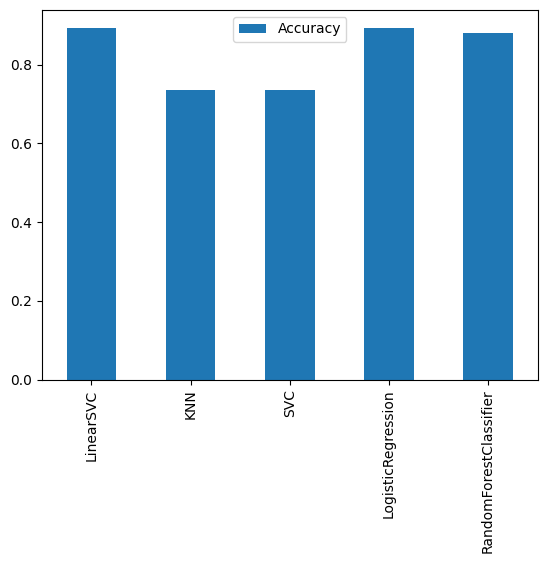

In [16]:

results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])
results_df.plot.bar()



### Hyperparameter Tuning


In [17]:

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [18]:

np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [19]:

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [20]:

rs_log_reg.score(X_test,y_test)

0.9078947368421053


### Classifier Model Evaluation


In [21]:

clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [22]:

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay



In [23]:

y_preds=clf.predict(X_test)

In [24]:

confusion_matrix(y_test,y_preds)

array([[23,  4],
       [ 3, 46]])

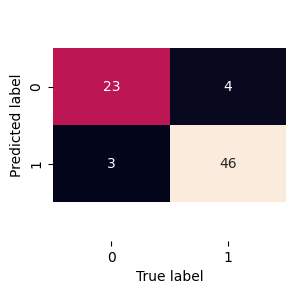

In [25]:

import seaborn as sns
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_preds)

In [26]:

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.92      0.94      0.93        49

    accuracy                           0.91        76
   macro avg       0.90      0.90      0.90        76
weighted avg       0.91      0.91      0.91        76



In [27]:

precision_score(y_test,y_preds)

np.float64(0.92)

In [28]:

recall_score(y_test,y_preds)

np.float64(0.9387755102040817)

In [29]:

f1_score(y_test,y_preds)

np.float64(0.9292929292929293)

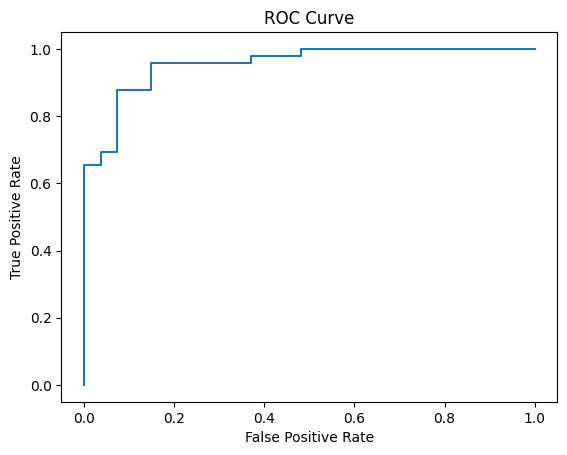

In [30]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [31]:

from sklearn.model_selection import cross_val_score

In [32]:

cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [33]:

cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

np.float64(0.8479781420765027)

In [34]:

cross_val_precision=np.mean(cross_val_score(clf,
                                            X,
                                            y,
                                            scoring="precision",
                                            cv=5))
cross_val_precision

np.float64(0.8215873015873015)

In [35]:

cross_val_recall=np.mean(cross_val_score(clf,
                                            X,
                                            y,
                                            scoring="recall",
                                            cv=5))
cross_val_recall

np.float64(0.9272727272727274)

In [36]:

cross_vald_f1_score=np.mean(cross_val_score(clf,
                                            X,
                                            y,
                                            scoring="f1",
                                            cv=5))
cross_vald_f1_score

np.float64(0.8705403543192143)

### Exporting and importing a trained model


In [37]:

from joblib import dump,load

In [38]:

dump(clf,"trained-classifier.joblib")

['trained-classifier.joblib']

In [39]:

loaded_clf=load("trained-classifier.joblib")
loaded_clf.score(X_test,y_test)

0.9078947368421053




## Scikit-Learn Regression Practice

In [40]:

car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:

car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [42]:

car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:

car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [44]:

from sklearn.ensemble import RandomForestRegressor
car_sales_X, car_sales_y = car_sales.drop("Price", axis=1), car_sales.Price
rf_regressor = RandomForestRegressor().fit(car_sales_X, car_sales_y)

ValueError: could not convert string to float: 'Honda'

As we see, the cell above breaks because our data contains non-numerical values as well as missing data.

To take care of some of the missing data, we'll remove the rows which have no labels (all the rows with missing values in the `Price` column).

In [ ]:

car_sales.dropna(subset=["Price"],inplace=True)

NameError: name 'car_sales' is not defined

### Building a pipeline


In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
 
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
    
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [ ]:

door_feature = ["Doors"]

door_transformer = Pipeline(steps=[
    
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [ ]:

numeric_features = ["Odometer (KM)"]

numeric_transformer = Pipeline(steps=[
   
    ("imputer", SimpleImputer(strategy="median"))])

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:

regression_models = {"Ridge": Ridge,
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf":SVR(kernel="rbf") ,
                     "RandomForestRegressor": RandomForestRegressor}

regression_results = {}

In [ ]:

car_sales_X = car_sales.drop("Price",axis=1)
car_sales_y = car_sales["Price"]

In [ ]:

car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)


car_X_train.shape,car_y_train.shape,car_X_test.shape,car_y_test.shape

((760, 4), (760,), (190, 4), (190,))

In [ ]:

for model_name, model in regression_models.items():
   
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", Ridge())])

    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, 
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [ ]:

regression_results

{'Ridge': 0.25402611057943925,
 'SVR_linear': 0.25402611057943925,
 'SVR_rbf': 0.25402611057943925,
 'RandomForestRegressor': 0.25402611057943925}

In [ ]:

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [ ]:

ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

ridge_pipeline.fit(car_X_train, car_y_train)

car_y_preds = ridge_pipeline.predict(car_X_test)

car_y_preds[:50]

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

In [ ]:

mse = mean_squared_error(car_y_test, car_y_preds)
mse

np.float64(49950182.633374564)

In [ ]:

mae=mean_absolute_error(car_y_test,car_y_preds)
mae

np.float64(5713.8215208551555)

In [ ]:

r2=r2_score(car_y_test,car_y_preds)
r2

0.25402611057943925